In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [2]:
TEST_DATA = './data/test'

In [3]:
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic

@register_line_magic
def runshell(command):
    with Popen(
        command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True
    ) as process:
        for line in iter(process.stdout.readline, b""):
            print(line.decode("utf-8"), end='')

In [4]:
def read_labels(rootdir):
    with open(rootdir + '/labels.txt') as fh_true, \
        open(rootdir + '/labels_pred.txt') as fh_pred:
        labels_true = fh_true.read().splitlines()
        labels_pred_prob = fh_pred.read().splitlines()
        labels_pred = []
        labels_prob = []
        for x in labels_pred_prob:
            tmp = x.split(',')
            labels_pred.append(tmp[0])
            labels_prob.append(float(tmp[1]))
        print('No of Test Rows: %d' % len(labels_true))
    return labels_true, labels_pred, labels_prob

In [5]:
def do_metrics(labels_true, labels_pred, labels_prob):
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(labels_true, labels_pred)
    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    print(classification_report(labels_true, labels_pred))
    
    labels_true_int = np.array(labels_true, dtype=int)
    
    # Receiver Operating Characteristic curve and Area under it
    fpr, tpr, _ = roc_curve(labels_true_int, labels_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision Recall Curve and Area Under it
    precision, recall, _ = precision_recall_curve(labels_true_int, labels_prob)
    average_precision = average_precision_score(labels_true_int, labels_prob)
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.text(0.5, 0.05, 'Area Under PR Curve: %0.2f' % average_precision, ha='center')
    plt.show()

c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Predicting
Done
No of Test Rows: 4909
metrics for NaiveBayesClassifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2354
           1       0.86      0.86      0.86      2555

    accuracy                           0.85      4909
   macro avg       0.85      0.85      0.85      4909
weighted avg       0.85      0.85      0.85      4909



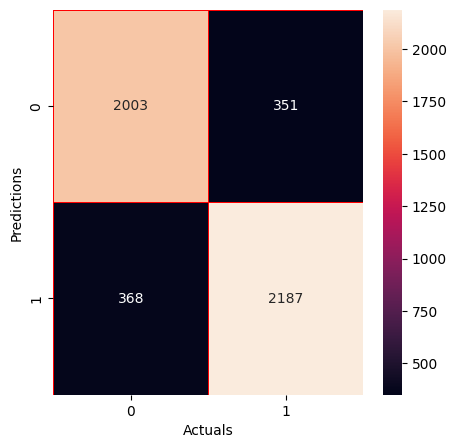

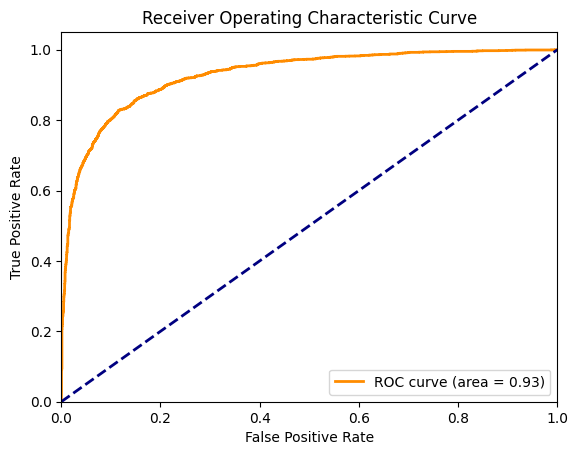

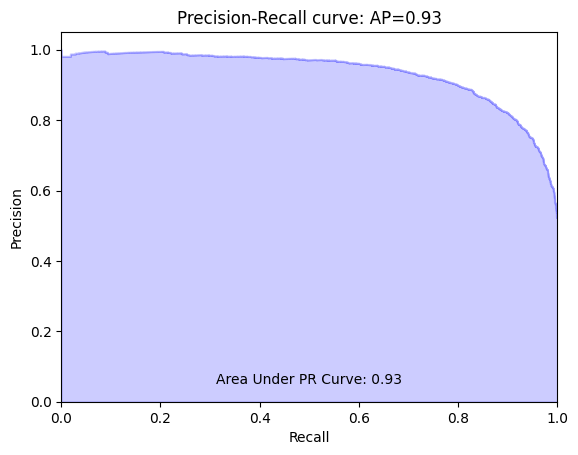

CPU times: total: 422 ms
Wall time: 908 ms


In [6]:
%%time

%runshell mltextclassifier.exe p 1 model\sta_NaiveBayesClassifier_mdl.bin data\test\features.txt data\test\labels_pred.txt

labels_true, labels_pred, labels_prob = read_labels(TEST_DATA)
print('metrics for NaiveBayesClassifier')
do_metrics(labels_true, labels_pred, labels_prob)

c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Predicting
Done
No of Test Rows: 4909
metrics for LogisticRegressionClassifier
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2354
           1       0.87      0.80      0.83      2555

    accuracy                           0.83      4909
   macro avg       0.83      0.83      0.83      4909
weighted avg       0.84      0.83      0.83      4909



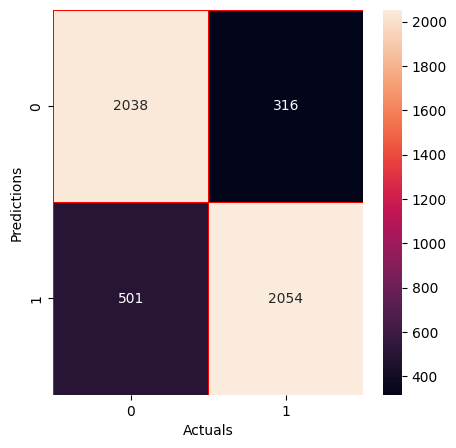

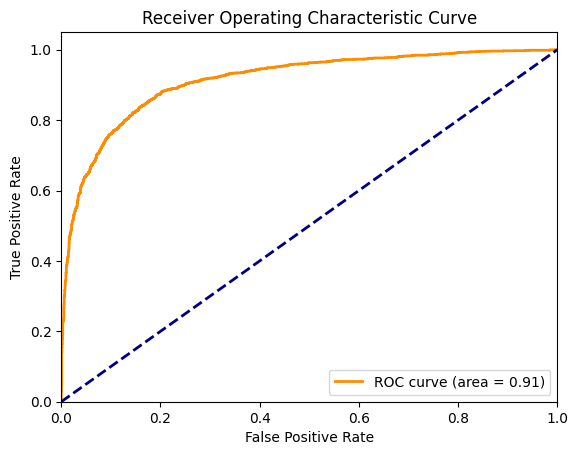

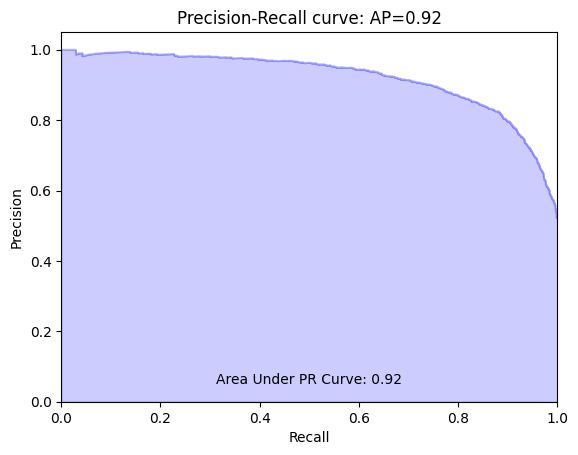

CPU times: total: 422 ms
Wall time: 764 ms


In [7]:
%%time

%runshell mltextclassifier.exe p 2 model\sta_LogisticRegressionClassifier_mdl.bin data\test\features.txt data\test\labels_pred.txt

labels_true, labels_pred, labels_prob = read_labels(TEST_DATA)
print('metrics for LogisticRegressionClassifier')
do_metrics(labels_true, labels_pred, labels_prob)

c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Predicting
Done
No of Test Rows: 4909
metrics for SVCClassifier
              precision    recall  f1-score   support

           0       0.84      0.38      0.53      2354
           1       0.62      0.93      0.75      2555

    accuracy                           0.67      4909
   macro avg       0.73      0.66      0.64      4909
weighted avg       0.73      0.67      0.64      4909



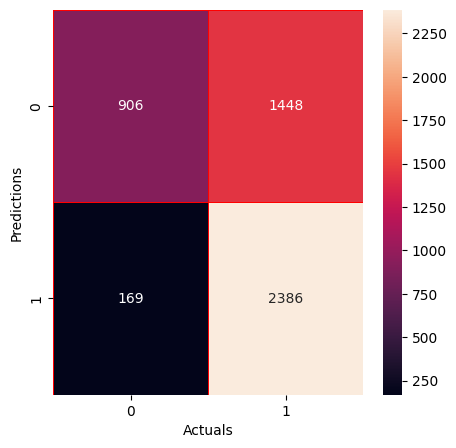

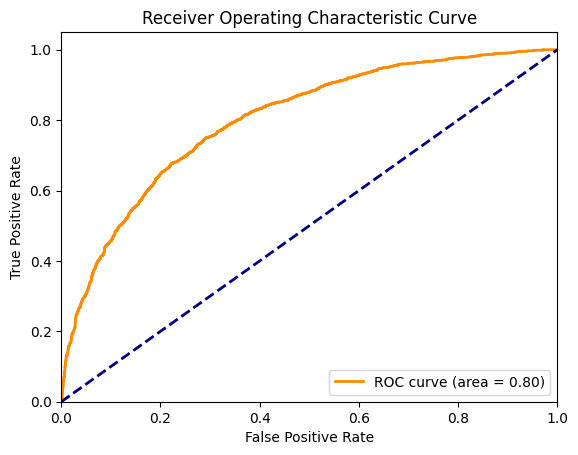

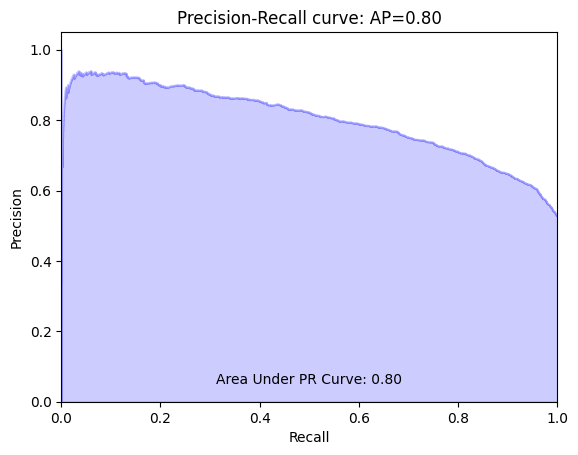

CPU times: total: 391 ms
Wall time: 707 ms


In [8]:
%%time

%runshell mltextclassifier.exe p 3 model\sta_SVCClassifier_mdl.bin data\test\features.txt data\test\labels_pred.txt

labels_true, labels_pred, labels_prob = read_labels(TEST_DATA)
print('metrics for SVCClassifier')
do_metrics(labels_true, labels_pred, labels_prob)

Predicting


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Done
No of Test Rows: 4909
metrics for RandomForestClassifier
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      2354
           1       0.65      0.41      0.50      2555

    accuracy                           0.58      4909
   macro avg       0.59      0.58      0.57      4909
weighted avg       0.60      0.58      0.56      4909



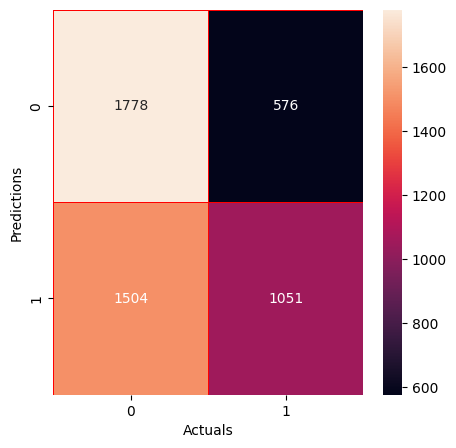

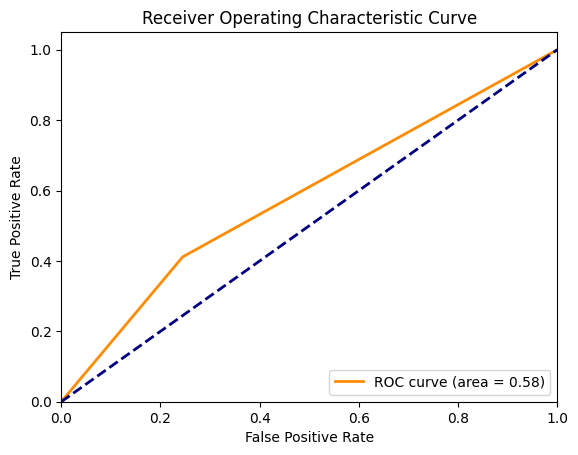

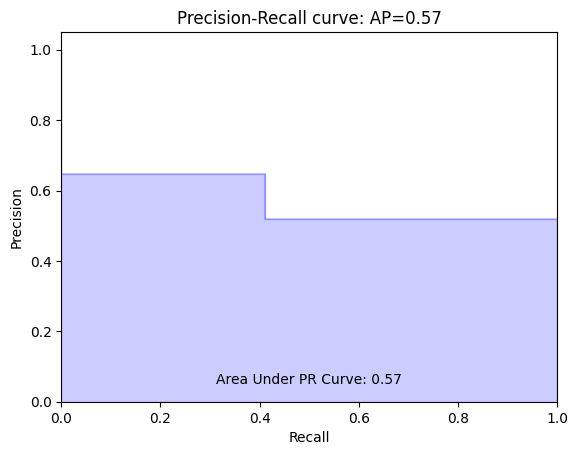

CPU times: total: 359 ms
Wall time: 538 ms


In [9]:
%%time

%runshell mltextclassifier.exe p 5 model\sta_RandomForestClassifier_mdl.bin data\test\features.txt data\test\labels_pred.txt

labels_true, labels_pred, labels_prob = read_labels(TEST_DATA)
print('metrics for RandomForestClassifier')
do_metrics(labels_true, labels_pred, labels_prob)

Predicting
Done
No of Test Rows: 4909
metrics for GradientBoostingClassifier


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


              precision    recall  f1-score   support

           0       0.54      0.75      0.63      2354
           1       0.64      0.42      0.50      2555

    accuracy                           0.57      4909
   macro avg       0.59      0.58      0.57      4909
weighted avg       0.59      0.57      0.56      4909



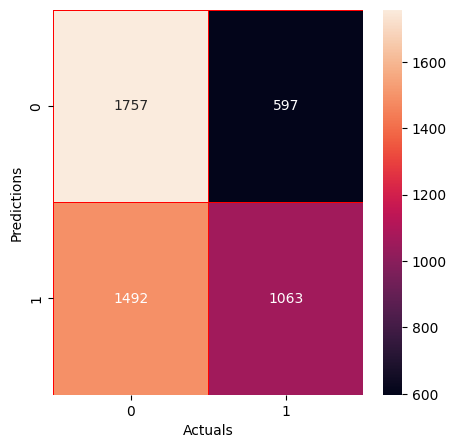

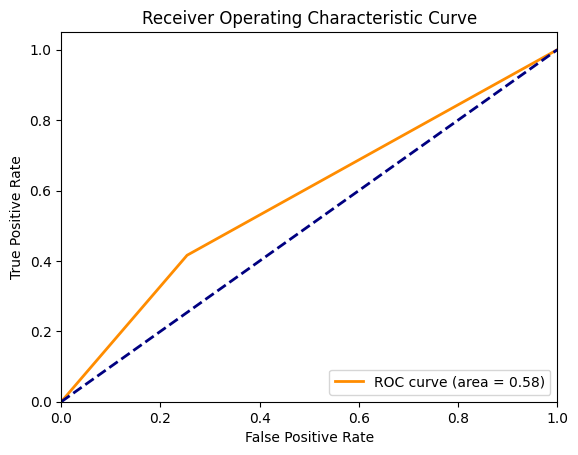

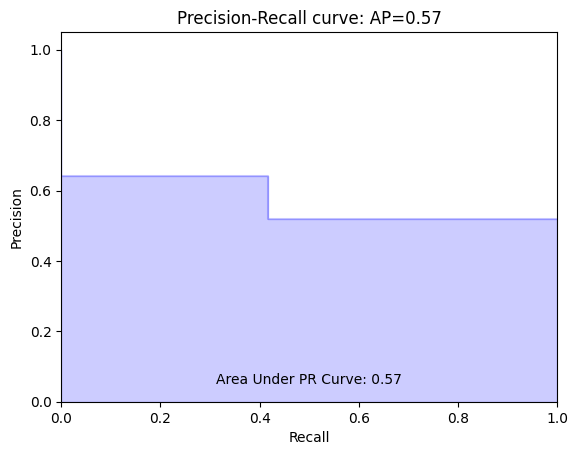

CPU times: total: 406 ms
Wall time: 554 ms


In [10]:
%%time

%runshell mltextclassifier.exe p 6 model\sta_GradientBoostingClassifier_mdl.bin data\test\features.txt data\test\labels_pred.txt

labels_true, labels_pred, labels_prob = read_labels(TEST_DATA)
print('metrics for GradientBoostingClassifier')
do_metrics(labels_true, labels_pred, labels_prob)